# Keyword network and Word frequency analysis





The objective of this project is to analyze a given dataset to extract and visualize the relationships between keywords. This analysis will involve constructing a weighted network based on keyword co-occurrence, and examining the properties of this network to identify key nodes and connections.


I aim to perform the following:

- Identification of the top keywords based on their connectivity and  influence within the network.
- Discovery of the strongest keyword pairs indicating significant co-occurrence.
- Visualization of the overall structure of the keyword network, highlighting the relationship between keyword connectivity and strength.

In [ ]:
import numpy as np
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
import networkx as nx
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Data Loading

In [ ]:
given_url = 'https://docs.google.com/spreadsheets/d/1GTwv07i98vL7S-J9eeP8NV1fJVnymm1eJ31RDyt4Mxw/edit#gid=822007629'

sheetid = '1GTwv07i98vL7S-J9eeP8NV1fJVnymm1eJ31RDyt4Mxw'
sheetname = 'Keyword_data'
new_url = f'https://docs.google.com/spreadsheets/d/{sheetid}/gviz/tq?tqx=out:csv&sheet={sheetname}'

In [ ]:
df_task1 = pd.read_csv(new_url)
df_task1.head()

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Feb/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
2,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
3,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
4,Managerialist and Human Capital Explanations f...,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN


In [ ]:
# converting data to lowercase
for col in df_task1.columns:
  df_task1[col]= df_task1[col].str.lower()

# removing nan rows
total_columns = len(df_task1.columns) + 1
df_task1['new_col'] = 0
df_task1['new_col'] = total_columns - df_task1.apply(lambda x: x.count(), axis=1)
df_task1.drop(df_task1[df_task1['new_col']==12].index, inplace = True)
df_task1.reset_index(drop = True, inplace= True)
df_task1.drop(columns = ['new_col'], inplace = True)
df_task1.shape

(49, 13)

In [ ]:
#making a copy of the above dataframe
df1 = df_task1.copy()
# pre processing the data
stop_words = set(stopwords.words('english'))
wl = WordNetLemmatizer()
key_col = [keyword for keyword in df1.columns if keyword.startswith('Keyword')]
for col in key_col:
  df1[col]= df1[col].apply(lambda x: re.sub(r"[^a-zA-Z0-9& ]", " ", str(x)))
  df1[col]= df1[col].apply(lambda x: " ".join(x.split()))
  df1[col] = df1[col].apply(lambda x: " ".join([wl.lemmatize(words) for words in x.split()]))
  df1[col] = df1[col].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
df1

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,meta-analyses of financial performance and equ...,equity,organizational sociology,performance,meta analysis,psychometrics,organizational research,financial performance,agency theory,organizational effectiveness,organizational behavior,corporate governance,nan
1,"home country environments, corporate diversifi...",diversification industry,business planning,performance standard,employee rating,corporate culture,strategic planning,organizational effectiveness,management science,management research,product management,nan,nan
2,safeguarding investments in asymmetric interor...,interorganizational relation,intergroup relation,business communication,investment,supply chain,knowledge management,interorganizational network,corporate governance,group decision making,intellectual capital,nan,nan
3,managerialist and human capital explanations f...,executive compensation,wage,human capital,labor economics,personnel management,management science,contingency theory management,compensation management,executive ability management,corporate governance,nan,nan
4,bidding wars over r&d-intensive firms: knowled...,knowledge management,information resource management,management information system,break even analysis,data mining,management science,research & development,research & development contract,corporate governance,decision making,organizational behavior,transaction cost
5,when “the show must go on”: surface acting and...,emotion psychology,interpersonal relation,stress psychology,social interaction,social psychology,employee attitude,customer service,customer satisfaction,job stress,peer review professional performance,nan,nan
6,relationships among supervisors' and subordina...,supervisor,justice,conflict management,mediation,employee,industrial relation,organizational behavior,united state national guard,organizational effectiveness,decision making,resource allocation,nan
7,punctuated equilibrium and linear progression:...,industrial relation,management science,decision theory,organizational sociology,punctuated equilibrium evolution,organizational change,organizational behavior,organizational structure,business model,organizational research,nan,nan
8,the relationship between overconfidence and th...,decision making,executive,industrial management,new product,high technology industry,nan,nan,nan,nan,nan,nan,nan
9,governance through ownership: centuries of pra...,corporate governance,industrial management,stockholder wealth,institutional investor,wage,new product,organizational structure,organizational behavior,decentralization management,organizational effectiveness,nan,nan


## **2. Write a Python code to extract keyword data from the above file and convert it to a weighted adjacency matrix.**

In [ ]:
#creating a unique list of keywords
df_keywords = pd.wide_to_long(df1,stubnames= 'Keyword ', i = 'Title',j = 'keywords')
df_keywords.reset_index(drop = True, inplace = True)
df_keywords.dropna(how= 'all', inplace = True )
df_keywords.reset_index(drop = True, inplace = True)
df_keywords.drop_duplicates(inplace = True)
df_keywords.reset_index(drop = True, inplace = True)
df_keywords.drop(index = 156, inplace = True)
df_keywords.reset_index(drop = True, inplace = True)
keyword_list = df_keywords['Keyword '].tolist()
keyword_list

['equity',
 'diversification industry',
 'interorganizational relation',
 'executive compensation',
 'knowledge management',
 'emotion psychology',
 'supervisor',
 'industrial relation',
 'decision making',
 'corporate governance',
 'executive',
 'family owned business enterprise',
 'institutional investor',
 'research & development',
 'property',
 'stock option',
 'management science',
 'aggression psychology',
 'chief executive officer',
 'mental fatigue',
 'personnel management',
 'product management',
 'social capital sociology',
 'organizational behavior',
 'new product',
 'leadership',
 'team workplace',
 'labor supply',
 'employee attitude',
 'work & family',
 'human capital',
 'social status',
 'employee motivation',
 'organizational change',
 'creative ability',
 'going public security',
 'international business enterprise management',
 'compensation management',
 'cross functional team',
 'service industry management',
 'organizational sociology',
 'business planning',
 'inte

In [ ]:
# creating an Adjacency matrix of zeroes
adj_mat = np.zeros(pow(len(keyword_list),2))
adj_mat = adj_mat.reshape(len(keyword_list),len(keyword_list))
adj_df = pd.DataFrame(adj_mat)
adj_df.index = keyword_list
adj_df.columns = keyword_list
adj_df

,equity,diversification industry,interorganizational relation,executive compensation,knowledge management,emotion psychology,supervisor,industrial relation,decision making,corporate governance,...,problem employee,strategic business unit,subsidiary corporation management,financial management,customer orientation,transaction cost,innovation adoption,work attitude,host country business,marketing strategy
equity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
diversification industry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
interorganizational relation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
executive compensation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
knowledge management,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
transaction cost,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
innovation adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
work attitude,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
host country business,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#creating weighted adjacency matrix
for index, row in df1.iterrows():
  words_connected = []
  for col in key_col:
    if row[col]!='nan':
      words_connected.append(row[col])
  for i in range(0,len(words_connected)):
    curr_word = words_connected[i]
    for j in range(i+1,len(words_connected)):
      next_word = words_connected[j]
      adj_df.loc[curr_word,next_word] = adj_df.loc[curr_word,next_word] + 1
      adj_df.loc[next_word, curr_word] = adj_df.loc[next_word, curr_word] + 1
adj_df

,equity,diversification industry,interorganizational relation,executive compensation,knowledge management,emotion psychology,supervisor,industrial relation,decision making,corporate governance,...,problem employee,strategic business unit,subsidiary corporation management,financial management,customer orientation,transaction cost,innovation adoption,work attitude,host country business,marketing strategy
equity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
diversification industry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
interorganizational relation,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
executive compensation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
knowledge management,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
transaction cost,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
innovation adoption,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
work attitude,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
host country business,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **3) Read the adjacency matrix and convert it into a weighted network**

Text(0.5, 1.0, 'Weighted Network graph for the Keywords')

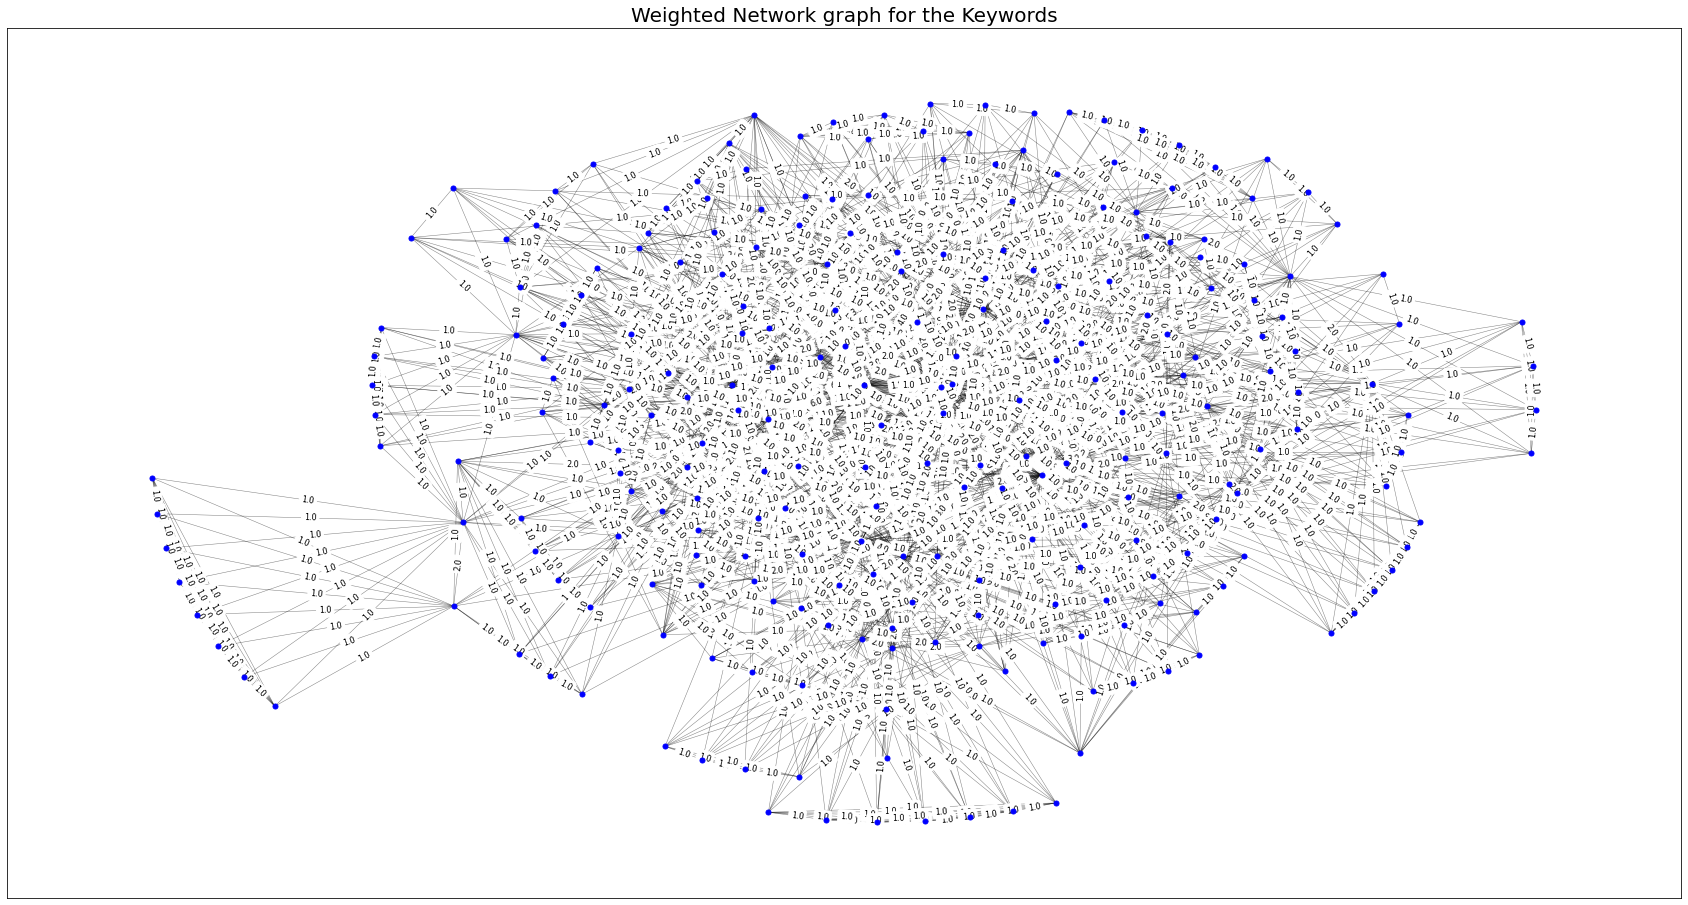

In [ ]:
G = nx.from_pandas_adjacency(adj_df)
plt.figure(figsize = (30,16))
pos = nx.kamada_kawai_layout(G)
node_options = {"node_color":"blue","node_size":25}
edge_options = {"width": 0.5, "alpha":0.5, "edge_color":"black"}
edge_weights =nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, **node_options)
nx.draw_networkx_edges(G, pos, **edge_options)
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weights, font_size=8)
plt.title("Weighted Network graph for the Keywords", fontsize = 20)

### **4) Compute node degree and strength**

In [ ]:
#degree
G.degree()

DegreeView({'equity': 10, 'diversification industry': 18, 'interorganizational relation': 24, 'executive compensation': 31, 'knowledge management': 19, 'emotion psychology': 9, 'supervisor': 10, 'industrial relation': 49, 'decision making': 90, 'corporate governance': 62, 'executive': 14, 'family owned business enterprise': 16, 'institutional investor': 20, 'research & development': 42, 'property': 14, 'stock option': 16, 'management science': 102, 'aggression psychology': 18, 'chief executive officer': 32, 'mental fatigue': 11, 'personnel management': 93, 'product management': 24, 'social capital sociology': 9, 'organizational behavior': 166, 'new product': 26, 'leadership': 31, 'team workplace': 55, 'labor supply': 9, 'employee attitude': 31, 'work & family': 9, 'human capital': 17, 'social status': 9, 'employee motivation': 35, 'organizational change': 48, 'creative ability': 15, 'going public security': 26, 'international business enterprise management': 11, 'compensation managemen

In [ ]:
#strength
G.degree(weight = 'weight')

DegreeView({'equity': 10.0, 'diversification industry': 20.0, 'interorganizational relation': 27.0, 'executive compensation': 36.0, 'knowledge management': 20.0, 'emotion psychology': 9.0, 'supervisor': 10.0, 'industrial relation': 59.0, 'decision making': 112.0, 'corporate governance': 85.0, 'executive': 14.0, 'family owned business enterprise': 19.0, 'institutional investor': 20.0, 'research & development': 47.0, 'property': 15.0, 'stock option': 18.0, 'management science': 136.0, 'aggression psychology': 20.0, 'chief executive officer': 37.0, 'mental fatigue': 11.0, 'personnel management': 126.0, 'product management': 28.0, 'social capital sociology': 9.0, 'organizational behavior': 265.0, 'new product': 32.0, 'leadership': 37.0, 'team workplace': 78.0, 'labor supply': 9.0, 'employee attitude': 38.0, 'work & family': 9.0, 'human capital': 18.0, 'social status': 9.0, 'employee motivation': 44.0, 'organizational change': 60.0, 'creative ability': 16.0, 'going public security': 27.0, '

In [ ]:
dict_degree = dict(G.degree())
dict_strength = dict(G.degree(weight = 'weight'))
graph_df = pd.DataFrame(columns = ['Keyword','degree','strength'])
keywords = [key for key in dict(G.degree(weight = 'weight')).keys()]
graph_df['Keyword'] = keywords
for key in keywords:
  for index, row in graph_df.iterrows():
    if row['Keyword'] == key:
      row['degree'] = dict_degree[key]
      row['strength'] = dict_strength[key]
graph_df

,Keyword,degree,strength
0,equity,10,10.0
1,diversification industry,18,20.0
2,interorganizational relation,24,27.0
3,executive compensation,31,36.0
4,knowledge management,19,20.0
...,...,...,...
243,transaction cost,11,11.0
244,innovation adoption,11,11.0
245,work attitude,11,11.0
246,host country business,11,11.0


### **Top 10 nodes by degree**




In [ ]:
degree_df = graph_df[['Keyword','degree']]
degree_df.sort_values(by='degree', ascending=False).iloc[0:10]

,Keyword,degree
23,organizational behavior,166
112,organizational effectiveness,104
16,management science,102
20,personnel management,93
8,decision making,90
156,organizational structure,74
40,organizational sociology,66
88,strategic planning,66
47,industrial management,64
9,corporate governance,62


### **Top 10 nodes by strength**

In [ ]:
strength_df = graph_df[['Keyword','strength']]
strength_df.sort_values(by='strength', ascending=False).iloc[0:10]

,Keyword,strength
23,organizational behavior,265.0
112,organizational effectiveness,144.0
16,management science,136.0
20,personnel management,126.0
8,decision making,112.0
156,organizational structure,107.0
40,organizational sociology,96.0
9,corporate governance,85.0
47,industrial management,84.0
88,strategic planning,80.0


### **Top 10 keyword pairs by weight**

In [ ]:
weighted_pair = []
for index, row in adj_df.iterrows(): #iterate over rows
    for columnIndex, value in row.items():
      weighted_pair.append([index, columnIndex,value])
weighted_df = pd.DataFrame(weighted_pair,columns = ['Keyword 1','Keyword 2', 'Weight'])
weighted_df['Min_keyword'] = weighted_df[['Keyword 1','Keyword 2']].min(axis=1)
weighted_df['Max_keyword'] = weighted_df[['Keyword 1','Keyword 2']].max(axis=1)
weighted_df = weighted_df.drop_duplicates(subset = ['Min_keyword', 'Max_keyword'], keep = 'first').reset_index(drop = True)
weighted_df.drop(columns = ['Min_keyword','Max_keyword'],  inplace = True)
weighted_df.sort_values(by='Weight', ascending=False, inplace = True)
weighted_df.reset_index(drop = True, inplace = True)
weighted_df.iloc[0:10]

,Keyword 1,Keyword 2,Weight
0,organizational behavior,organizational effectiveness,11.0
1,organizational behavior,organizational structure,9.0
2,personnel management,organizational behavior,8.0
3,management science,organizational behavior,7.0
4,organizational effectiveness,organizational structure,6.0
5,corporate governance,organizational behavior,6.0
6,organizational behavior,organizational sociology,6.0
7,decision making,organizational behavior,6.0
8,organizational behavior,industrial management,5.0
9,team workplace,organizational sociology,5.0


### **Plotting Average strength Vs Degree**

In [ ]:
avg_strength_df = graph_df.groupby(['degree'])['strength'].mean()
avg_strength_df=avg_strength_df.to_frame()
avg_strength_df['degree'] = avg_strength_df.index
avg_strength_df.reset_index(drop = True, inplace = True)
avg_strength_df

,strength,degree
0,4.000000,4
1,7.000000,7
2,8.000000,8
3,9.000000,9
4,10.000000,10
5,11.000000,11
6,14.500000,14
7,16.000000,15
8,18.200000,16
9,18.153846,17


Text(0.5, 1.0, 'Avg strength Vs Degree')

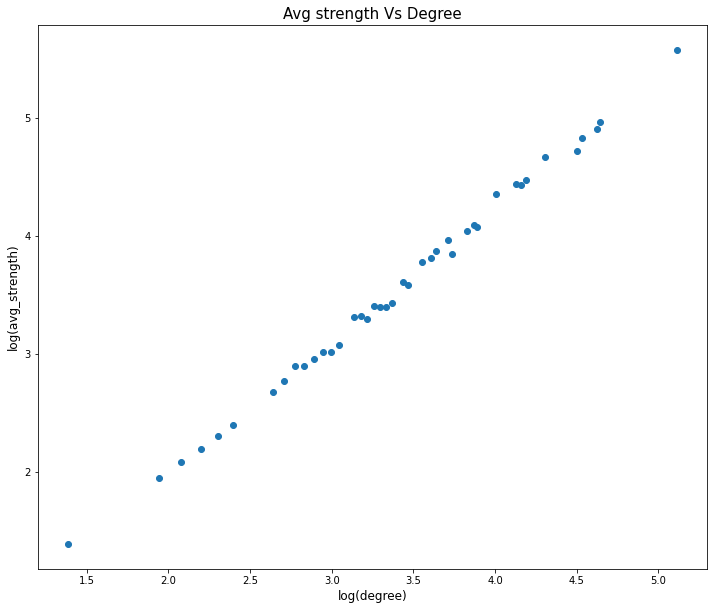

In [ ]:
plt.figure(figsize = (12,10))
plt.scatter(x = np.log(avg_strength_df['degree']), y = np.log(avg_strength_df['strength']))
plt.xlabel('log(degree)', fontsize = 12)
plt.ylabel('log(avg_strength)', fontsize = 12)
plt.title('Avg strength Vs Degree', fontsize = 15)